In [1]:
import sys
sys.path.append("../")

import yaml
import matplotlib.pyplot as plt
import cattrs
from typing import List
#from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict
from mixture_optimization.datamodels.trial_tracking_config import Experiment, ValResult, Dict

In [2]:
def read_experiments(experimnt_history):
    with open(experimnt_history, 'r') as f:
        obj = yaml.safe_load(f)
    
    experiments = cattrs.structure(obj, List[Experiment])
    return experiments


def get_experiment_result(experiment: Experiment):
    val_results: List[Dict[str, ValResult]] = []
    domain_weights: List[Dict[str, float]] = []
    weighted_perplexity = []
    for i, trial in enumerate(experiment.trials):
        if not trial.weighted_val_perplexity:
            print(f"Trial {i} did not finish yet. Breaking")
            break
        val_results.append(trial.val_results)
        weighted_perplexity.append(trial.weighted_val_perplexity)
        domain_weights.append(trial.true_mixing_weights)
    return val_results, weighted_perplexity, domain_weights

def plot_weighted_val_perplexity(weighted_val_perplexities: List[float]):
    plt.plot(weighted_val_perplexities)
    plt.xlabel('Run')
    plt.ylabel('Weighted Val Perplexity')
    plt.title('Weighted Val Perplexity')

def plot_domain_perplexities(val_results: List[Dict[str, ValResult]]):
    max_plots_per_row = 4
    domains = val_results[0].keys()
    num_plots = len(domains)
    num_rows = num_plots // max_plots_per_row + 1
    num_cols = min(num_plots, max_plots_per_row)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.suptitle('Domain Perplexities')
    axs = axs.flatten()

    for i, domain in enumerate(domains):
        domain_perplexities = [val_result[domain].perplexity for val_result in val_results]
        axs[i].plot(domain_perplexities)
        axs[i].set_title(domain)
        axs[i].set_xlabel('Run')
        axs[i].set_ylabel('Perplexity')
    plt.tight_layout()  

def plot_mixing_weights(mixing_weights: List[Dict[str, float]]):
    max_plots_per_row = 4
    domains = mixing_weights[0].keys()
    num_plots = len(domains)
    num_rows = num_plots // max_plots_per_row + 1
    num_cols = min(num_plots, max_plots_per_row)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, 5*num_rows))
    fig.suptitle('Mixing Weights')
    axs = axs.flatten()

    for i, domain in enumerate(domains):
        mix_w = [weight[domain] for weight in mixing_weights]
        axs[i].plot(mix_w)
        axs[i].set_title(domain)
        axs[i].set_xlabel('Run')
        axs[i].set_ylabel('Mixing Weight')
        axs[i].legend()
    plt.tight_layout()  

Trial 15 did not finish yet. Breaking


/tmp/ipykernel_178909/790752472.py:62: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axs[i].legend()


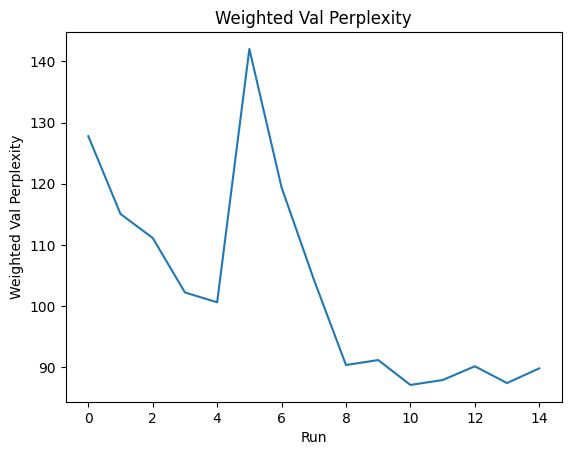

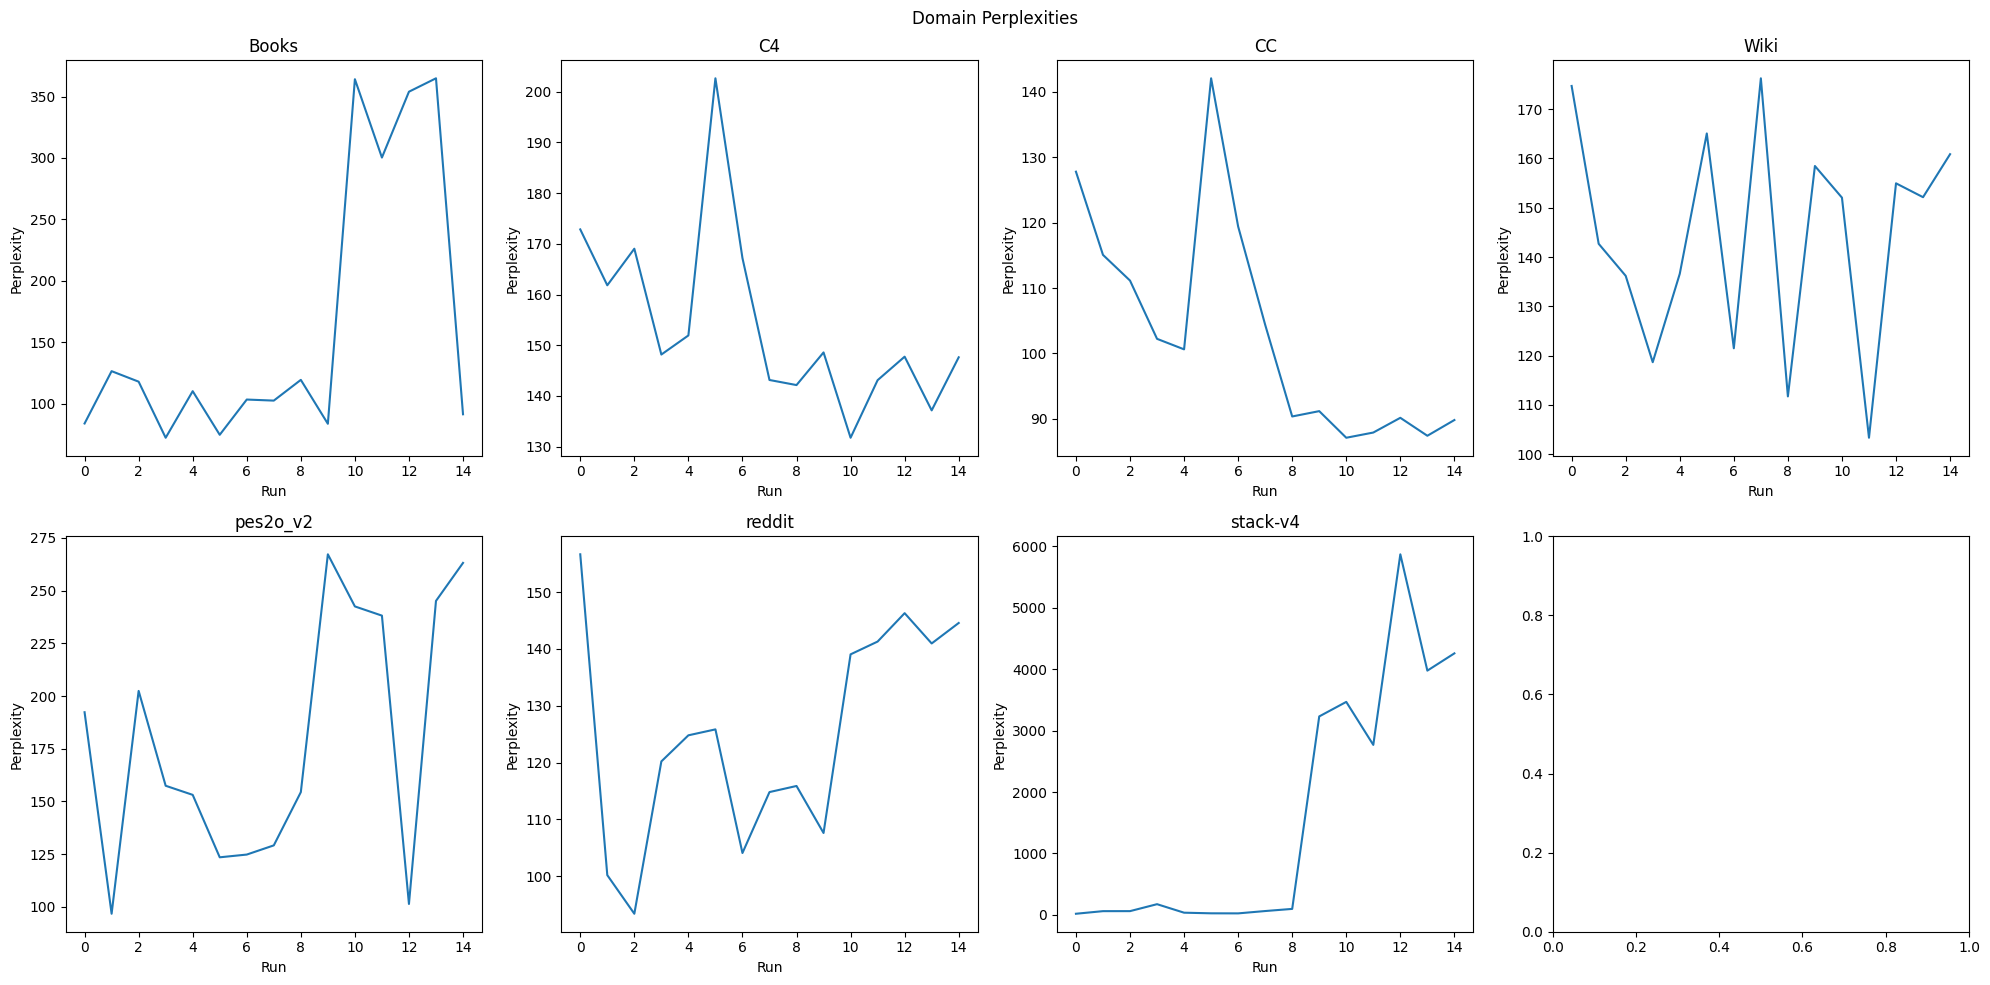

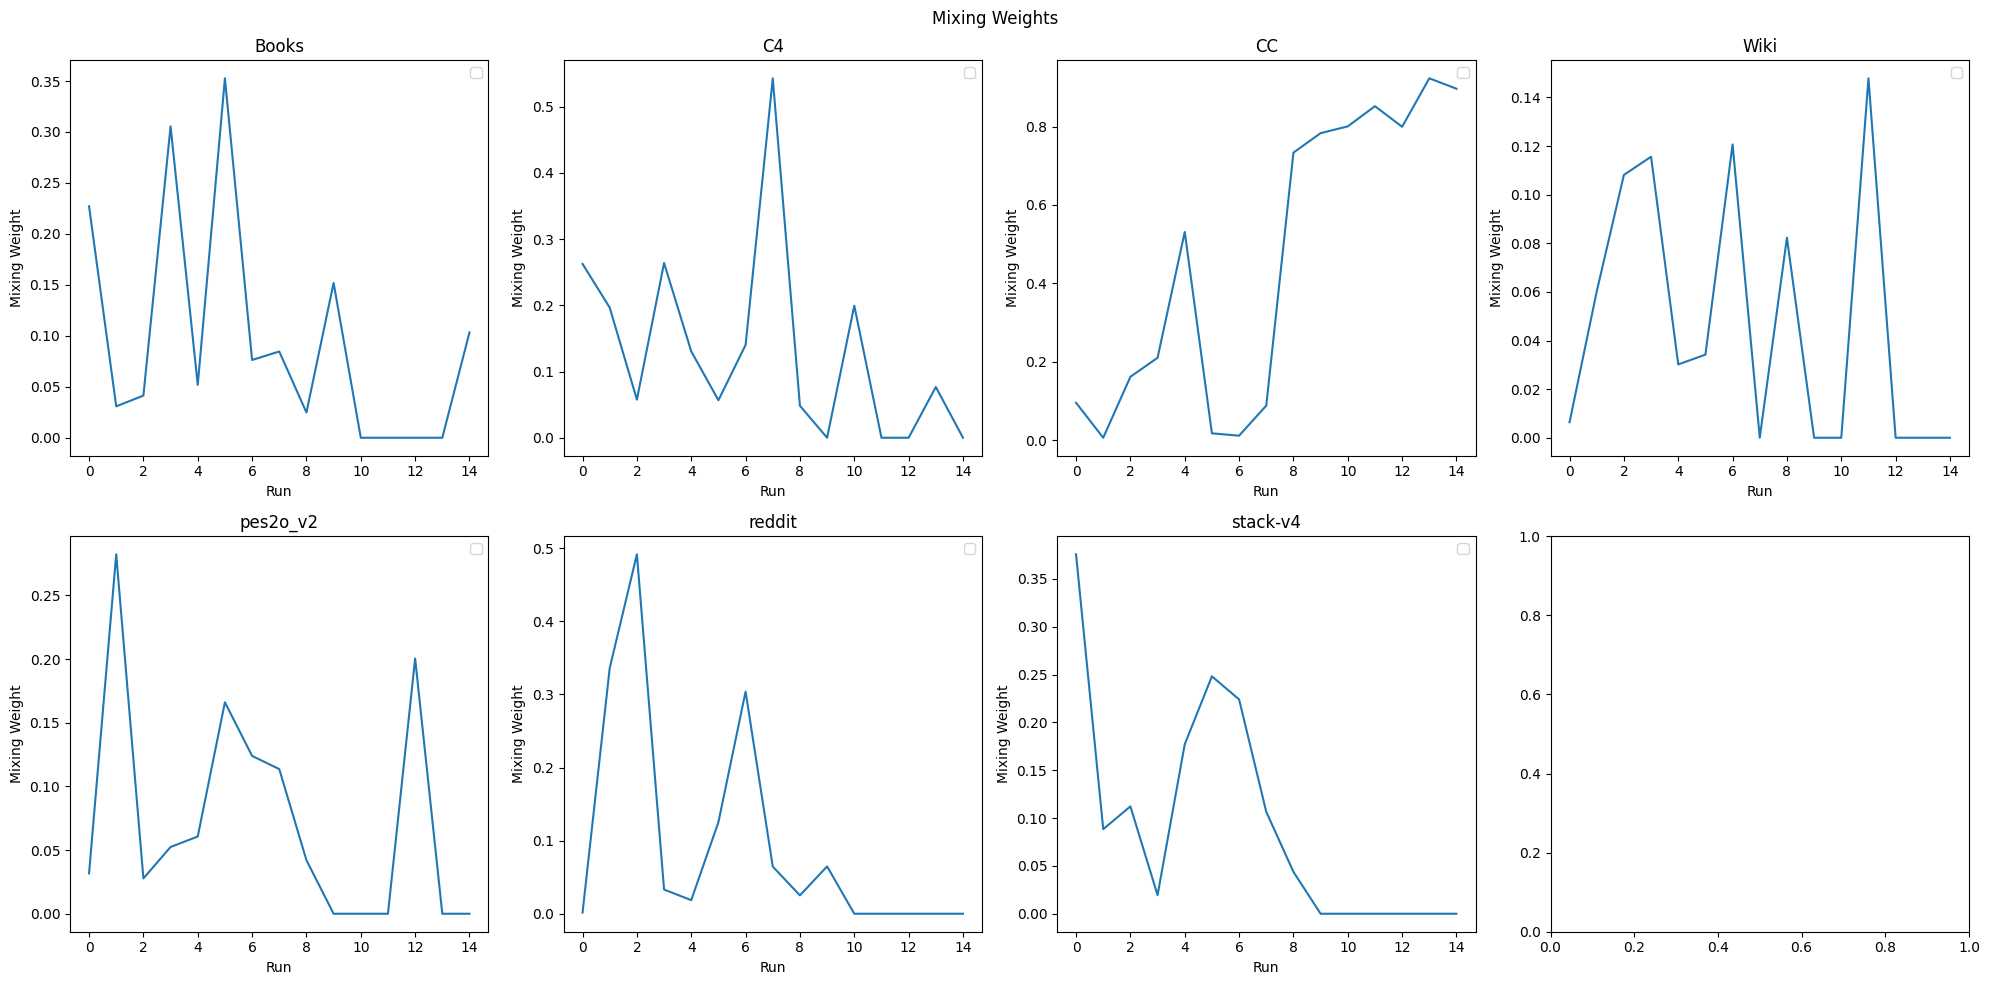

In [3]:
experiment_history_path = "../logs/turbo-new_15/experiment_history.yaml"
#experiment_history_path = "../logs/bayesian_new_1/experiment_history.yaml"
#experiment_history_path = "../logs/turbo-try_again/experiment_history.yaml"
experiments = read_experiments(experimnt_history=experiment_history_path)
val_results, weighted_perplexity, domain_weights = get_experiment_result(experiments[0])

plot_weighted_val_perplexity(weighted_perplexity)
plot_domain_perplexities(val_results)
plot_mixing_weights(domain_weights)
plt.show()